# Standard Analysis Notebook
CellPLATO


In [1]:
import cellPLATO as cp

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

Finished running cellPLATO initialization and loaded config.
Initializing:  Fig1_PBMCderivedeNKsICAM_10_4_2022
Hypthesis testing using:  st.ttest_ind
Plots will be exported to:  D:/Michael_Shannon/CELLPLATO_MASTER/FIGURE_1_ALT_OUTPUT/Fig1_PBMCderivedeNKsICAM_10_4_2022\2022-10-04_16-39-51-558852\plots/
Using unique embedding per dataset shortname:  Fig1_PBMCderivedeNKsICAM_10_4_2022
Exporting static Superplots
Exporting static Plots of Differences
Exporting static Marginal scatterplots
Exporting static Timeplots
Exporting Bar plots
Using corresponding CTL_SHORTLABEL:  eNKs  for condition:  Condition_PBMCeNK_20x
Dataset in current notebook:  Fig1_PBMCderivedeNKsICAM_10_4_2022
Finished initializing data_processing
Finished intializing visualizations
Finished initializing cellPLATO


In [2]:
OVERWRITE_DATAFRAMES = False

In [3]:
if os.path.exists(cp.SAVED_DATA_PATH + 'dr_df.csv'):
    print(cp.SAVED_DATA_PATH + 'dr_df_.csv',' exists, loading dataframes...')
    
    # Load existing (preprocessed) data
    comb_df = pd.read_csv(cp.SAVED_DATA_PATH + 'comb_df.csv')
    dr_df = pd.read_csv(cp.SAVED_DATA_PATH + 'dr_df.csv')
    lab_dr_df = pd.read_csv(cp.SAVED_DATA_PATH + 'lab_dr_df.csv')
    tavg_df = pd.read_csv(cp.SAVED_DATA_PATH + 'tavg_df.csv')
else:
    
    print('File doesnt exist.')

File doesnt exist.


# Load the data from h5 files in folder structure

In [4]:
# Get the experiment list from the experiments listed in the config 
exp_list = cp.populate_experiment_list()
display(exp_list)

Condition                   Experiment  \
0        Condition_PBMCeNK_20x  PBMCeNK_untreated_1__tracks   
1        Condition_PBMCeNK_20x  PBMCeNK_untreated_2__tracks   
2  Condition_PBMCeNK_20x_cytoD       PBMCeNK_CytoD_2_tracks   

                  Replicate_ID Condition_shortlabel Replicate_shortlabel  
0  PBMCeNK_untreated_1__tracks                 eNKs               eNKs_0  
1  PBMCeNK_untreated_2__tracks                 eNKs               eNKs_1  
2       PBMCeNK_CytoD_2_tracks           eNKs CytoD         eNKs CytoD_0

##### Optionally, override the experiment list in the config and select a subset.

In [5]:
# Local overide to CONDITION_SHORTLABELS in Notebook.
# conditions_to_include = ['WT_20x', 'KO_20x','WT_100x', 'KO_100x']
# conditions_to_include = ['WT_20x', 'KO_20x']
# conditions_to_include = ['WT_100x', 'KO_100x']

# conditions_to_include = ['WT Day 0', 'WT Day 7']
# # conditions_to_include = ['WT Day 0']
# # conditions_to_include = ['WT Day 7']

# # Filter exp_list using CONDITION_SHORTLABELS
# exp_list = exp_list[exp_list['Condition_shortlabel'].isin(conditions_to_include)]
# display(exp_list)

In [29]:
# Before running dr_pipeline, check if the file already exists in the local namespace
if 'comb_df' in locals():
    
    print('Using loaded comb_df')
    
else: 

    # Load, process and combine the dataframes (including segmentation and migration calculations)
    comb_df = cp.combine_dataframes(exp_list)
    comb_df = cp.measurement_pipeline(comb_df)

Using loaded comb_df


## Filtering data (upstream of dimensionality reduction)

Applying filters:
{'area': (10, 10000), 'ntpts': (12, 1800)}
Beginning filtering ...
99603  data points from  1765  cells
Applying filters to entire cell trajectory:
{'area': (10, 10000), 'ntpts': (12, 1800)}
...
 Finished filtering. Resulting dataframe contains:
99603  data points from  1765  cells


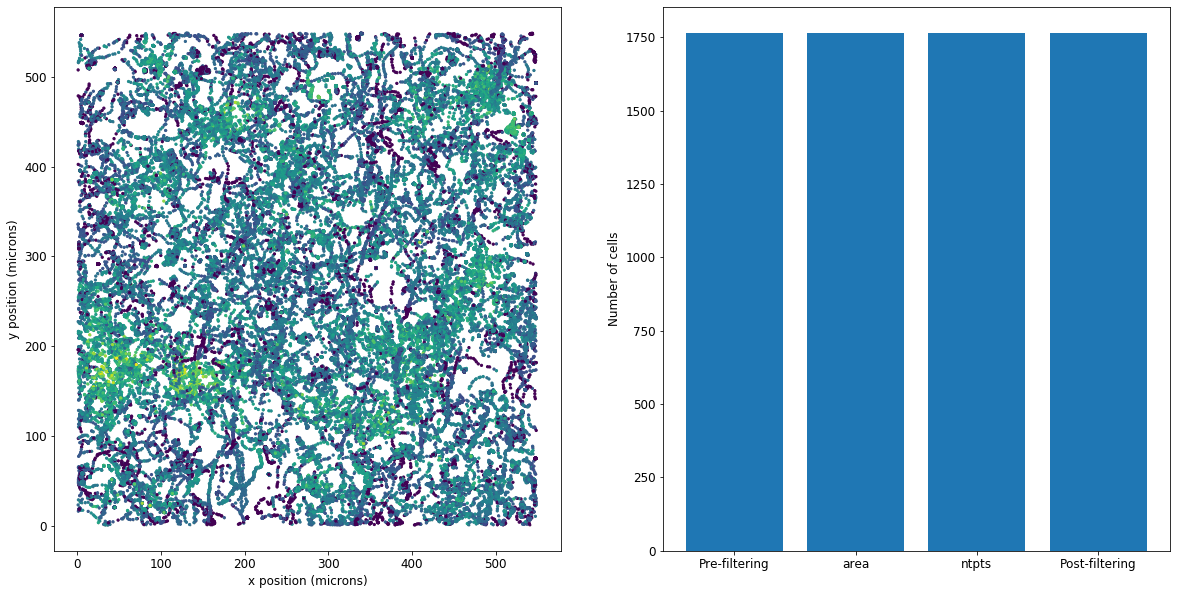

In [30]:
# User-defined filters in dict {factor:(min, max)}
data_filters = {
#   "speed": (10, 100),
  "area": (10, 10000), # Warning: range will change if self-normalized
  "ntpts": (12,1800)
}

# Returns a filtered dataframe, while also adding included column to comb_df
filt_df, filt_counts = cp.apply_filters(comb_df,filter_dict=data_filters)

fig = cp.visualize_filtering(comb_df, filt_counts)

In [31]:
factor = 'speed'
cp.time_superplot(filt_df, factor)

In [9]:
display(comb_df)

rep_row_ind  frame           x            y    z    _  particle  \
0                 0    0.0  799.329590   494.029968  0.0  0.0       3.0   
1                 1    0.0  300.612488     2.675000  0.0  0.0       4.0   
2                 2    0.0  594.805664     9.274881  0.0  0.0       5.0   
3                 3    0.0  282.206512     8.706522  0.0  0.0       6.0   
4                 4    0.0  683.407654    21.515924  0.0  0.0       7.0   
...             ...    ...         ...          ...  ...  ...       ...   
117542        50429  179.0  275.939758   927.138550  0.0  0.0     267.0   
117543        50430  179.0  745.479614   970.051025  0.0  0.0     280.0   
117544        50431  179.0  519.621338  1006.883484  0.0  0.0     287.0   
117545        50432  179.0  888.057983   722.318848  0.0  0.0     385.0   
117546        50433  179.0  989.909119   236.636368  0.0  0.0     717.0   

             area   bbox_area  eccentricity  ...  arrest_coefficient  \
0       76.994523   98.622198      0.519964  ...                 0.0   
1       23.069520   28.260162      0.840753  ...                 0.0   
2       60.845859   73.822464      0.318587  ...                 0.0   
3       26.529948   34.604280      0.560565  ...                 0.0   
4       90.547866  166.100544      0.883363  ...                 0.0   
...           ...         ...           ...  ...                 ...   
117542  95.738508  151.393725      0.789490  ...                 0.8   
117543  56.520324   69.208560      0.367640  ...                 0.8   
117544  59.404014   73.822464      0.273254  ...                 0.8   
117545  39.794922   52.483158      0.634021  ...                 0.6   
117546  28.548531   38.064708      0.258698  ...                 0.8   

        Condition_shortlabel  Replicate_shortlabel  rip_p      rip_K  \
0                       eNKs                eNKs_0    1.0  17.715518   
1                       eNKs                eNKs_0    2.0  35.431035   
2                       eNKs                eNKs_0    0.0   0.000000   
3                       eNKs                eNKs_0    2.0  35.431035   
4                       eNKs                eNKs_0    0.0   0.000000   
...                      ...                   ...    ...        ...   
117542            eNKs CytoD          eNKs CytoD_0    0.0   0.000000   
117543            eNKs CytoD          eNKs CytoD_0    0.0   0.000000   
117544            eNKs CytoD          eNKs CytoD_0    0.0   0.000000   
117545            eNKs CytoD          eNKs CytoD_0    0.0   0.000000   
117546            eNKs CytoD          eNKs CytoD_0    1.0  46.560014   

           rip_L    aspect  uniq_id  ntpts included  
0       2.374663  1.170702      0_3  149.0     True  
1       3.358281  1.846999      0_4    1.0    False  
2       0.000000  1.054971      0_5   21.0     True  
3       3.358281  1.207568      0_6   71.0     True  
4       0.000000  2.133605      0_7    6.0    False  
...          ...       ...      ...    ...      ...  
117542  0.000000  1.629292    2_267  163.0     True  
117543  0.000000  1.075305    2_280  163.0     True  
117544  0.000000  1.039564    2_287  165.0     True  
117545  0.000000  1.293132    2_385  146.0     True  
117546  3.849742  1.035241    2_717   80.0     True  

[117547 rows x 49 columns]

In [10]:
comb_df = filt_df
display(comb_df)

index  rep_row_ind  frame           x            y    z    _  \
0           0            0    0.0  799.329590   494.029968  0.0  0.0   
1           2            2    0.0  594.805664     9.274881  0.0  0.0   
2           3            3    0.0  282.206512     8.706522  0.0  0.0   
3           5            5    0.0  802.851440    25.554285  0.0  0.0   
4           7            7    0.0  553.896545    64.684731  0.0  0.0   
...       ...          ...    ...         ...          ...  ...  ...   
99598  117542        50429  179.0  275.939758   927.138550  0.0  0.0   
99599  117543        50430  179.0  745.479614   970.051025  0.0  0.0   
99600  117544        50431  179.0  519.621338  1006.883484  0.0  0.0   
99601  117545        50432  179.0  888.057983   722.318848  0.0  0.0   
99602  117546        50433  179.0  989.909119   236.636368  0.0  0.0   

       particle        area   bbox_area  ...  arrest_coefficient  \
0           3.0   76.994523   98.622198  ...                 0.0   
1           5.0   60.845859   73.822464  ...                 0.0   
2           6.0   26.529948   34.604280  ...                 0.0   
3           8.0  100.929150  159.179688  ...                 0.0   
4          10.0   58.538907   73.534095  ...                 0.0   
...         ...         ...         ...  ...                 ...   
99598     267.0   95.738508  151.393725  ...                 0.8   
99599     280.0   56.520324   69.208560  ...                 0.8   
99600     287.0   59.404014   73.822464  ...                 0.8   
99601     385.0   39.794922   52.483158  ...                 0.6   
99602     717.0   28.548531   38.064708  ...                 0.8   

       Condition_shortlabel  Replicate_shortlabel  rip_p      rip_K     rip_L  \
0                      eNKs                eNKs_0    1.0  17.715518  2.374663   
1                      eNKs                eNKs_0    0.0   0.000000  0.000000   
2                      eNKs                eNKs_0    2.0  35.431035  3.358281   
3                      eNKs                eNKs_0    0.0   0.000000  0.000000   
4                      eNKs                eNKs_0    1.0  17.715518  2.374663   
...                     ...                   ...    ...        ...       ...   
99598            eNKs CytoD          eNKs CytoD_0    0.0   0.000000  0.000000   
99599            eNKs CytoD          eNKs CytoD_0    0.0   0.000000  0.000000   
99600            eNKs CytoD          eNKs CytoD_0    0.0   0.000000  0.000000   
99601            eNKs CytoD          eNKs CytoD_0    0.0   0.000000  0.000000   
99602            eNKs CytoD          eNKs CytoD_0    1.0  46.560014  3.849742   

         aspect  uniq_id  ntpts included  
0      1.170702      0_3  149.0     True  
1      1.054971      0_5   21.0     True  
2      1.207568      0_6   71.0     True  
3      1.730697      0_8   86.0     True  
4      1.121894     0_10  148.0     True  
...         ...      ...    ...      ...  
99598  1.629292    2_267  163.0     True  
99599  1.075305    2_280  163.0     True  
99600  1.039564    2_287  165.0     True  
99601  1.293132    2_385  146.0     True  
99602  1.035241    2_717   80.0     True  

[99603 rows x 50 columns]

# Time-averaged dataframe and summaries

In [11]:
''' To go into preprocessed conditional'''

if 'tavg_df' in locals():
    
    print('Using loaded tavg_df')
    
else: 
    # Process a time-averaged DataFrame
    tavg_df = cp.time_average(filt_df)
    
display(tavg_df)

Cond_label                    Condition  \
0           Condition_PBMCeNK_20x        Condition_PBMCeNK_20x   
1           Condition_PBMCeNK_20x        Condition_PBMCeNK_20x   
2           Condition_PBMCeNK_20x        Condition_PBMCeNK_20x   
3           Condition_PBMCeNK_20x        Condition_PBMCeNK_20x   
4           Condition_PBMCeNK_20x        Condition_PBMCeNK_20x   
...                           ...                          ...   
1760  Condition_PBMCeNK_20x_cytoD  Condition_PBMCeNK_20x_cytoD   
1761  Condition_PBMCeNK_20x_cytoD  Condition_PBMCeNK_20x_cytoD   
1762  Condition_PBMCeNK_20x_cytoD  Condition_PBMCeNK_20x_cytoD   
1763  Condition_PBMCeNK_20x_cytoD  Condition_PBMCeNK_20x_cytoD   
1764  Condition_PBMCeNK_20x_cytoD  Condition_PBMCeNK_20x_cytoD   

     Condition_shortlabel       MSD  Rep_label                 Replicate_ID  \
0                    eNKs  3.692250        0.0  PBMCeNK_untreated_1__tracks   
1                    eNKs  2.751970        0.0  PBMCeNK_untreated_1__tracks   
2                    eNKs  3.497786        0.0  PBMCeNK_untreated_1__tracks   
3                    eNKs  3.480858        0.0  PBMCeNK_untreated_1__tracks   
4                    eNKs  4.036134        0.0  PBMCeNK_untreated_1__tracks   
...                   ...       ...        ...                          ...   
1760           eNKs CytoD  0.090644        2.0       PBMCeNK_CytoD_2_tracks   
1761           eNKs CytoD  0.100871        2.0       PBMCeNK_CytoD_2_tracks   
1762           eNKs CytoD  0.329255        2.0       PBMCeNK_CytoD_2_tracks   
1763           eNKs CytoD  0.433076        2.0       PBMCeNK_CytoD_2_tracks   
1764           eNKs CytoD  0.594030        2.0       PBMCeNK_CytoD_2_tracks   

     Replicate_shortlabel         _       area  arrest_coefficient  ...  \
0                  eNKs_0  0.000000  77.042907            0.107383  ...   
1                  eNKs_0  0.047619  51.315950            0.161905  ...   
2                  eNKs_0  0.000000  26.042564            0.123944  ...   
3                  eNKs_0  0.000000  73.443561            0.125581  ...   
4                  eNKs_0  0.000000  57.625089            0.089189  ...   
...                   ...       ...        ...                 ...  ...   
1760         eNKs CytoD_0  0.000000  35.354039            0.786667  ...   
1761         eNKs CytoD_0  0.000000  43.255350            0.742857  ...   
1762         eNKs CytoD_0  0.200000  30.624788            0.613333  ...   
1763         eNKs CytoD_0  0.000000  19.506103            0.600000  ...   
1764         eNKs CytoD_0  0.083333  26.626071            0.566667  ...   

      turn_angle        uniq_id  unique_id           x       x_pix  \
0      -6.641143  2.033760e+294        0.0  794.142081  794.142081   
1       2.212041   2.405002e+39        1.0  588.448210  588.448210   
2      -3.349963  8.536065e+138        2.0  297.421645  297.421645   
3      -4.765884  9.396288e+168        3.0  862.617268  862.617268   
4      -3.279635            inf        4.0  552.828382  552.828382   
...          ...            ...        ...         ...         ...   
1760   -4.248520   1.998200e+58     1760.0  128.155619  128.155619   
1761    5.952071   1.500158e+68     1761.0  543.498675  543.498675   
1762   -4.680889   1.400481e+73     1762.0  284.023763  284.023763   
1763  -11.421457   1.501515e+68     1763.0   33.200597   33.200597   
1764   -4.154378   1.752018e+58     1764.0  543.549296  543.549296   

            x_um           y       y_pix        y_um         z  
0     426.454297  486.881136  486.881136  261.455170  0.000000  
1     315.996689    6.845329    6.845329    3.675942  0.033055  
2     159.715423    8.209955    8.209955    4.408746  0.000000  
3     463.225473   38.273375   38.273375   20.552802  0.000000  
4     296.868841   48.313053   48.313053   25.944109  0.000000  
...          ...         ...         ...         ...       ...  
1760   68.819568  122.756059  122.756059   65.920004  0.000000  
1761  291.858788   

In [12]:
# Average, n per condition
factor = 'speed'
cp.stats_table(tavg_df, factor)

Returning stats_table using test:  st.ttest_ind  for factor:  speed
Note: for exploratory purposes only, no multiple comparison correction is being applied.


Condition_PBMCeNK_20x  \
Condition_PBMCeNK_20x                          NaN   
Condition_PBMCeNK_20x_cytoD                    0.0   

                             Condition_PBMCeNK_20x_cytoD  
Condition_PBMCeNK_20x                                0.0  
Condition_PBMCeNK_20x_cytoD                          NaN

In [13]:
# Time-averaged plots of differences
ctl_label = cp.CONDITIONS_TO_INCLUDE[0]

cp.plots_of_differences_plotly(tavg_df, factor=factor, ctl_label=ctl_label)#, ='CTL_LABEL')

eNKs CytoD vs eNKs: P = 0.0
P =  0.0  (Using t-test without multiple comparison correction)
------


In [14]:
# Time-averaged superplots
cp.superplots_plotly(tavg_df, factor, t='timeaverage')

In [15]:

# Make summary calculations from time-averaged dataframe
#Per condition:
avg_df = cp.average_per_condition(tavg_df)

# Per replicate
repavg_df = cp.average_per_condition(tavg_df, avg_per_rep=True)


In [16]:
# Make summary calculations from time-averaged dataframe
#Per condition:
avg_df,std,n = cp.average_per_condition(tavg_df, avg_per_rep=False)

# display(avg_df)
# display(std)
# display(n)

In [17]:
cond_stats = cp.average_per_condition(tavg_df, avg_per_rep=False)
cp.comparative_bar(cond_stats, x='Condition', y=factor, to_plot='avg',title='_per_condition_')

In [18]:
# Average, n per replicate
rep_stats = cp.average_per_condition(tavg_df, avg_per_rep=True)
cp.comparative_bar(rep_stats, x='Replicate_ID', y=factor, to_plot='avg', title='_per_replicate_')

# Dimensionality Reduction

In [19]:
# comb_df = filt_df

In [20]:
# Before running dr_pipeline, check if the file already exists in the local namespace
if 'dr_df' in locals():
    
    print('Using loaded dr_df')
    
else: 

    dr_df = cp.dr_pipeline(comb_df, dr_factors=cp.DR_FACTORS) 

Running dr_pipeline...
tSNE perplexity =  185
UMAP nearest neighbors =  10  min distance =  0.5
Using standardized factors for dimensionality reduction, matrix shape:  (99603, 28)
Using openTSNE with perplexity =  185
Using openTSNE to calculate new embedding for input data.
Embedding shape:  (99603, 2)


In [21]:
pca_df, components, expl = cp.do_pca(comb_df[cp.DR_FACTORS])

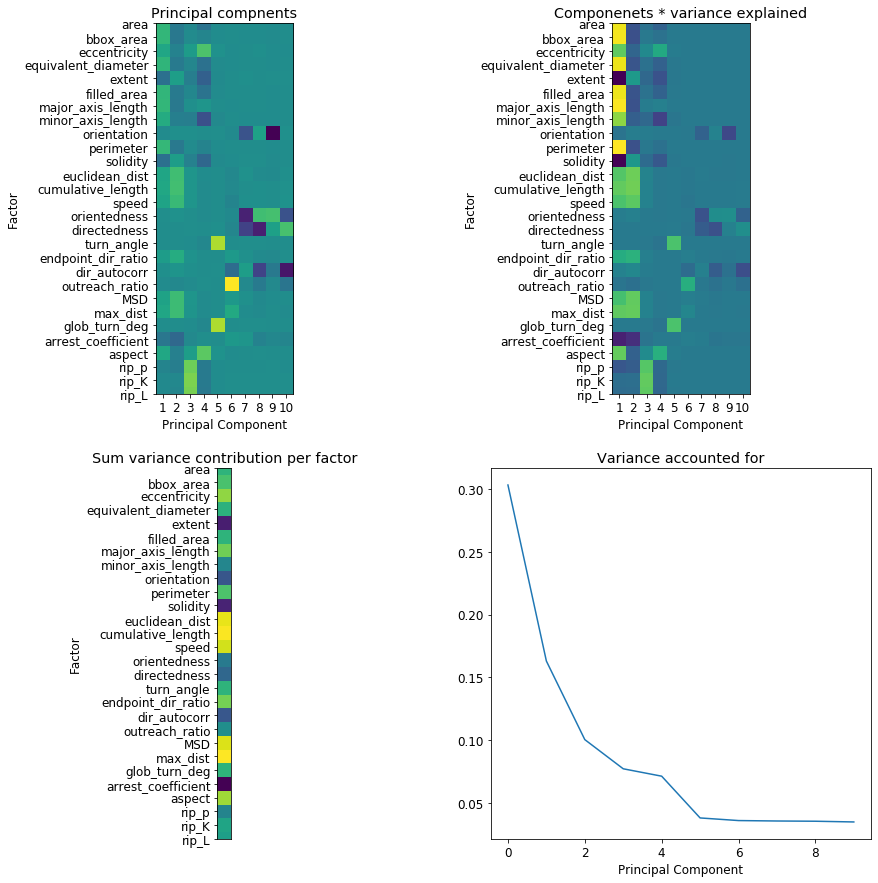

In [22]:
f = cp.pca_factor_vis(dr_df,pca_tuple=[pca_df, components, expl])#cp.DR_FACTORS)

['eNKs' 'eNKs CytoD']
['eNKs' 'eNKs CytoD']


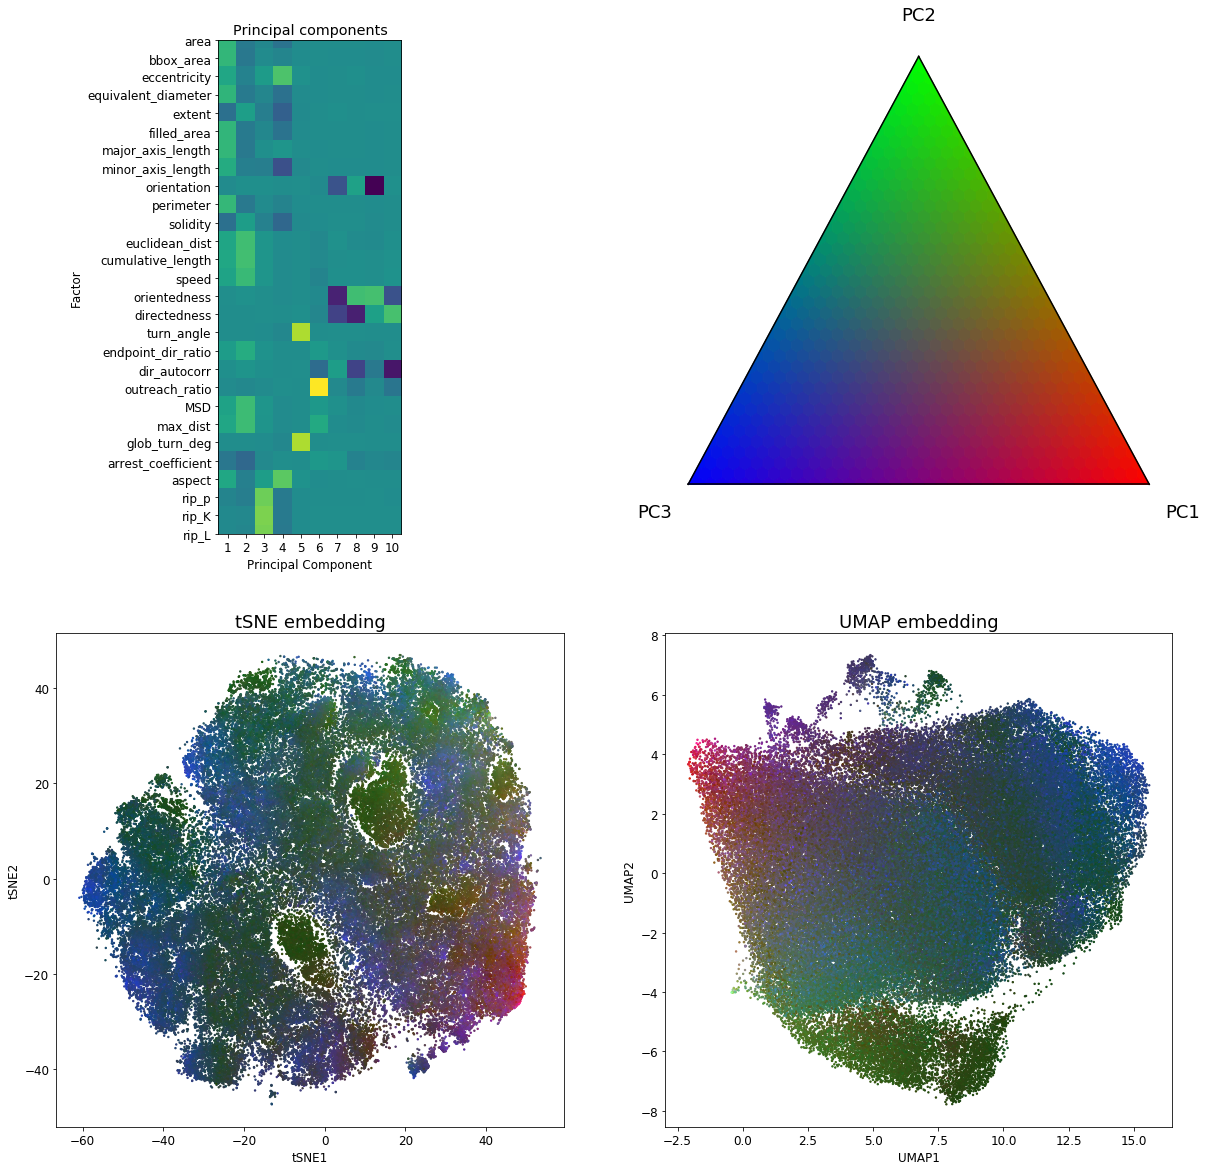

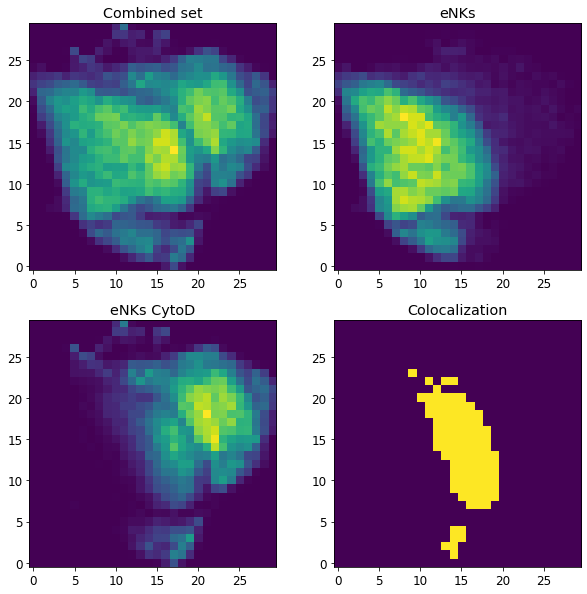

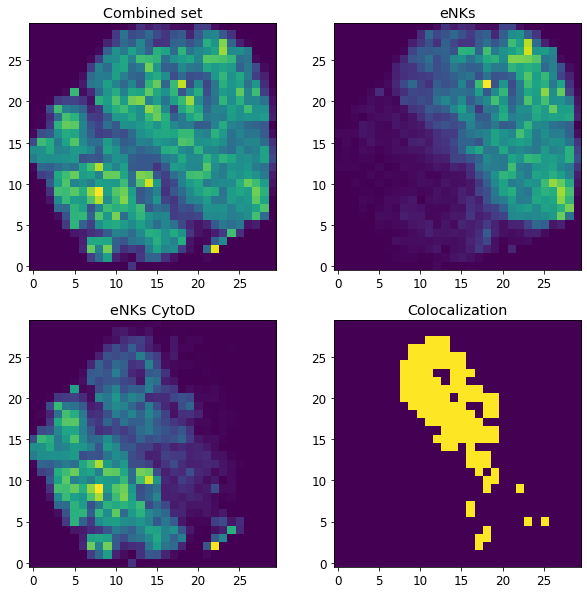

In [25]:
f=cp.dimension_reduction_subplots(dr_df,pca_tuple=[pca_df, components, expl])
f=cp.spatial_img_coloc(dr_df, xy='umap',thresh=40,n_bins=30)
f=cp.spatial_img_coloc(dr_df, xy='tsne',thresh=40,n_bins=30)

##### Dissect the lowd embedding by conditions

In [32]:
# sub_df_1 = lab_dr_df[lab_dr_df['Condition_shortlabel'].str.contains('20x')]
# sub_df_2 = lab_dr_df[lab_dr_df['Condition_shortlabel'].str.contains('100x')]

# xy = 'UMAP'
# f1=vis.spatial_img_coloc(sub_df_1, xy=xy,thresh=20,n_bins=100)
# f2=vis.spatial_img_coloc(sub_df_2, xy=xy,thresh=20,n_bins=100)

NameError: name 'lab_dr_df' is not defined

In [ ]:
# sub_df_1 = lab_dr_df[lab_dr_df['Condition_shortlabel'].str.contains('WT')]
# sub_df_2 = lab_dr_df[lab_dr_df['Condition_shortlabel'].str.contains('KO')]

# xy = 'UMAP'
# f1=vis.spatial_img_coloc(sub_df_1, xy=xy,thresh=20,n_bins=100)
# f2=vis.spatial_img_coloc(sub_df_2, xy=xy,thresh=20,n_bins=100)

  0%|                                         | 0/144 [00:00<?, ?it/s]

Something is up with D:/Michael_Shannon/CELLPLATO_MASTER/FIGURE_1_ALT/Condition_PBMCeNK_20x\PBMCeNK_untreated_1__tracks.h5


 18%|█████▊                          | 26/144 [00:01<00:04, 24.09it/s]

Something is up with D:/Michael_Shannon/CELLPLATO_MASTER/FIGURE_1_ALT/Condition_PBMCeNK_20x\PBMCeNK_untreated_2__tracks.h5


 43%|█████████████▊                  | 62/144 [00:03<00:03, 24.99it/s]

Something is up with D:/Michael_Shannon/CELLPLATO_MASTER/FIGURE_1_ALT/Condition_PBMCeNK_20x_cytoD\PBMCeNK_CytoD_2_tracks.h5


100%|███████████████████████████████| 144/144 [00:07<00:00, 19.02it/s]


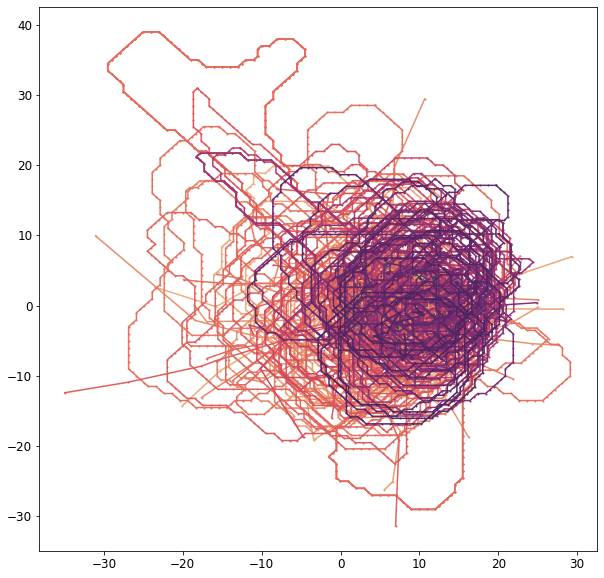

In [39]:
cp.dr_contour_matrix(dr_df,n_grid_pts=12, dr_method='umap',t_window=12) # dr_method='umap'

  0%|                                          | 0/36 [00:00<?, ?it/s]

Something is up with D:/Michael_Shannon/CELLPLATO_MASTER/FIGURE_1_ALT/Condition_PBMCeNK_20x\PBMCeNK_untreated_1__tracks.h5


 19%|██████▌                           | 7/36 [00:00<00:02, 10.16it/s]

Something is up with D:/Michael_Shannon/CELLPLATO_MASTER/FIGURE_1_ALT/Condition_PBMCeNK_20x\PBMCeNK_untreated_2__tracks.h5


 53%|█████████████████▍               | 19/36 [00:02<00:01, 14.06it/s]

Something is up with D:/Michael_Shannon/CELLPLATO_MASTER/FIGURE_1_ALT/Condition_PBMCeNK_20x_cytoD\PBMCeNK_CytoD_2_tracks.h5


100%|█████████████████████████████████| 36/36 [00:03<00:00, 10.79it/s]


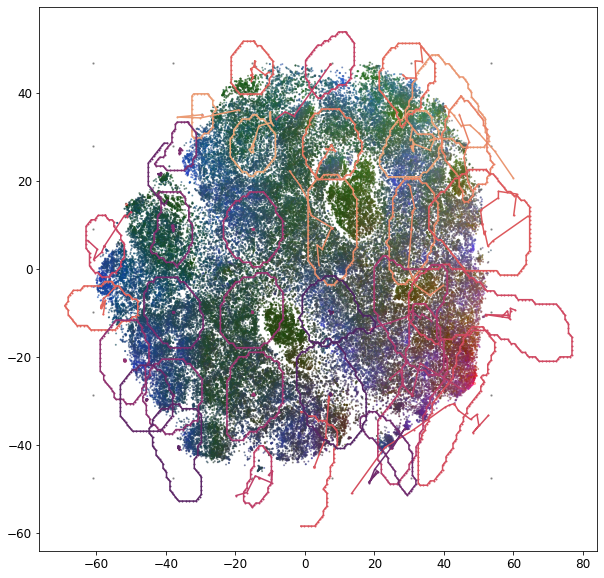

In [40]:
cp.dr_contour_matrix(dr_df,n_grid_pts=6, dr_method='tSNE',t_window=12) # dr_method='umap'

### Cluster the cell behaviour

In [41]:
cp.CONDITIONS_TO_INCLUDE

['Condition_PBMCeNK_20x', 'Condition_PBMCeNK_20x_cytoD']

hdbscan_clustering() with min_cluster_size =  20
DBScan clustering by tSNE...


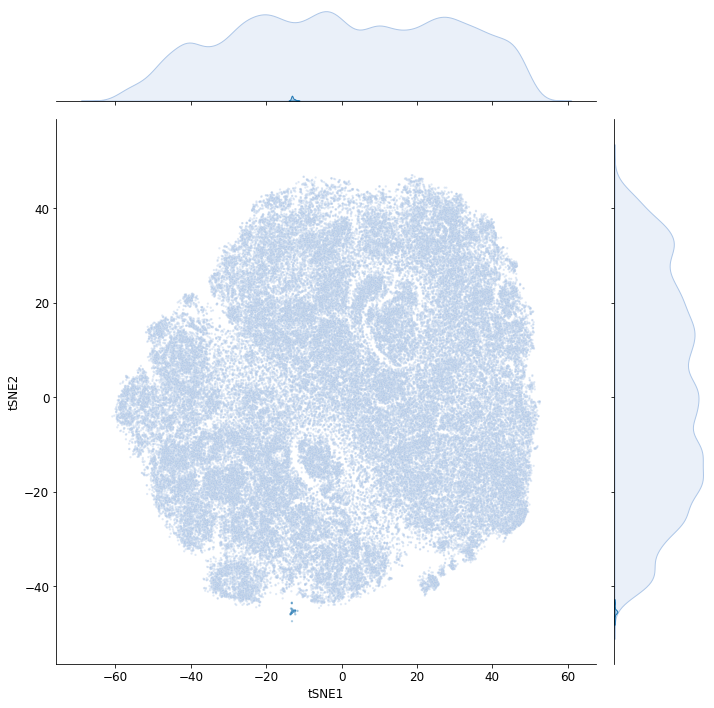

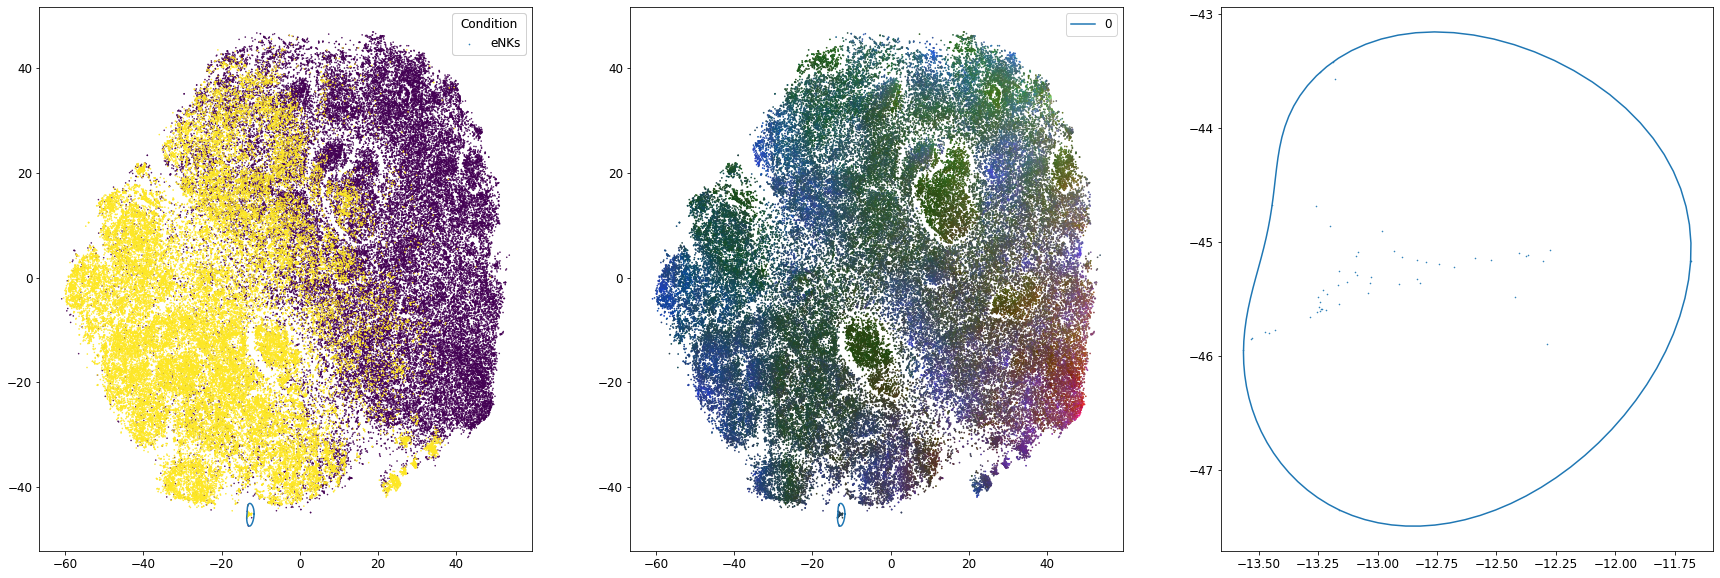

In [45]:

dr_method = cp.CLUSTER_BY
# dr_method = 'tsne'

lab_dr_df = cp.hdbscan_clustering(dr_df, cluster_by=dr_method, plot=True)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=[30,10])
# fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=[150,50])
cp.draw_cluster_hulls(lab_dr_df,cluster_by=dr_method, color_by='condition',ax=ax1,draw_pts=True,save_path=cp.CLUST_PARAMS_DIR+'condition')
cp.draw_cluster_hulls(lab_dr_df,cluster_by=dr_method, color_by='PCs',ax=ax2,legend=True,draw_pts=True,save_path=cp.CLUST_PARAMS_DIR+'pca')
cp.draw_cluster_hulls(lab_dr_df,cluster_by=dr_method, color_by='cluster',ax=ax3,draw_pts=True,save_path=cp.CLUST_PARAMS_DIR+'cluster')


In [ ]:
# Run the trajectory clustering pipeline
lab_dr_df, traj_list, cluster_lst = cp.trajectory_clustering_pipeline(lab_dr_df, traj_factor='umap', dist_metric='hausdorff', filename_out='std_dr_df_traj')

cp.plot_traj_cluster_avg(traj_list, cluster_lst, label='')
cp.trajectory_cluster_vis(lab_dr_df,traj_factor='umap', scatter=True)
cp.datashader_lines(lab_dr_df, 'UMAP1', 'UMAP2',color_by='traj_id', categorical=True, identifier='traj_id')

### Cluster switching analysis

In [ ]:
# Count the cluster changes
sum_labels, tptlabel_dr_df = cp.count_cluster_changes(lab_dr_df)
display(sum_labels)

cp.time_superplot(tptlabel_dr_df, 'n_changes',t_window=None)

### Cluster Purity

In [ ]:
clust_sum_df = cp.cluster_purity(lab_dr_df) 
display(clust_sum_df)
trajclust_sum_df = cp.cluster_purity(lab_dr_df, cluster_label='traj_id')
display(trajclust_sum_df)

In [ ]:
'''Note: accepts multiple dataframe inputs, could accept just one..'''
f = cp.purity_plots(lab_dr_df, clust_sum_df,lab_dr_df,trajclust_sum_df)

In [ ]:
clust_sum_t_df = cp.cluster_composition_timecourse(lab_dr_df)
cp.cluster_timeplot(clust_sum_t_df)

In [ ]:
# Count the number of cells that fall into each cluster - show on per condition and replicate basis.
lab_count_df = cp.get_label_counts(lab_dr_df, per_rep=True)

# Plot the counts per subgroup in a swarm plot
fig = px.strip(lab_count_df, x="label", y="count", color="Condition")
fig.show()

In [ ]:
if OVERWRITE_DATAFRAMES:
    # Save dataframes to shared data folder
    tavg_df.to_csv(cp.SAVED_DATA_PATH + 'tavg_df.csv')
    comb_df.to_csv(cp.SAVED_DATA_PATH + 'comb_df.csv')
    dr_df.to_csv(cp.SAVED_DATA_PATH + 'dr_df.csv')
    lab_dr_df.to_csv(cp.SAVED_DATA_PATH + 'lab_dr_df.csv')